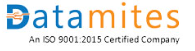

**Project Team ID**: PTID-CDS-OCT-23-1670

**Project id**: PRCP-1015-EquakeDamagePred

**Submitted by**: Anjani Kumar

# **EarthQuake Damage Prediction**
------------------------------

## **Business Case-Study**

Earthquakes are natural disasters with the potential to cause widespread devastation, leading to loss of life, property damage, and disruption of
essential services. Traditional seismic design and retrofitting methods have limitations in predicting and preventing the full extent of damage.
Hence, there is a critical need for innovative solutions that leverage advanced technologies to enhance predictive capabilities of earthquake damage.
In recent years, the frequency and intensity of earthquakes have posed a significant threat to urban infrastructure, causing substantial
economic losses and human suffering.

So, This business case study explores the development and implementation of an advanced earthquake damage prediction system aimed at mitigating the
impact of seismic events on buildings infrastructure in earthquake-prone regions. The primary objective of this business case is to propose the
development and deployment of an earthquake damage prediction system that utilizes six different types of machine learning algorithms including:
Logistic Regression, K-Nearest Neighbors, Decision Trees, Random Forest,
Gradient Boosting, XG-Boosting.

Benefit from this model: Improved Urban Planning, Enhanced Public Safety, Reduced Economic Losses caused by earthquakes.


--------
## **Dataset Description**

This dataset consists total 40 features with 260601 rows.

**Target explained** here:

1) Damage_grade: This presents the level of damage grade affected at the time of earthquake.(1,2,3 represents low damage, medium amount of damage,almost complete destruction respectively)

**Others Features** are explained here:

1) building_id: It represents each building units.

2) geo_level_1_id: This is the highest level of geographic region classification. It can have values in the range of 0 to 30. Each value typically represents a broad region or country.

3) geo_level_2_id: This is a more detailed sub-region within the geo_level_1_id. It can have values in the range of 0 to 1427, which provides more specific information about the region where the building is located.

4) geo_level_3_id: This is the most specific sub-region classification. It can have values in the range of 0 to 12567, offering the most detailed information about the geographic location of the building.

5) count_floors_pre_eq: Number of floors in the building before the earthquake.

6) age: Age of the building in years.

7) area_percentage: Normalized area of the building footprint.

8) height_percentage: Normalized height of the building footprint.

9) land_surface_condition: Surface condition of the land where the building was built. Possible values:(n: Normal Surface Condition, o: Poor Surface Condition, t: Unusual Surface Condition)

10) foundation_type: Type of foundation used in the building. Possible values:(h: Hard or Concrete, i: Similartohard, r: Rubble stone, u: Bamboo or Timber, w: Other or Wooden)

11) roof_type: Type of roof used in building. Possible values:(n: No roof, q: Quasi-flat roof., x: Traditional roof structure)

12) ground_floor_type: Type of the ground floor. Possible values:(f:Floorslab, m: Mud, v: Other, x: Timber, z: Bamboo)

13) other_floor_type: Type of constructions used in higher than the ground floors (except roof). Possible values:(j: Jackets, q: Quasi-adobe, s: Wooden or Timber, x: Unknown)

14) position: Position of the building while construction. Possible values:(j: Jutting, o: Onesideattached, s: Semi-detached or Attached-2 side, t: Terraced or Linear)

15) plan_configuration: Building plan configuration. Possible values:(a:Rectangular, c: L-shaped, d: T-shaped, f: Wing-shaped, m: Multiple or Complex, n: Square-shaped, o: Other or Unique,q: H-shaped, s: U-shaped, u: E-shaped)

16) has_superstructure_adobe_mud: Flag variable that indicates if the superstructure was made of Adobe/Mud.

17) has_superstructure_mud_mortar_stone: Flag variable that indicates if the superstructure was made of Mud Mortar-Stone.

18) has_superstructure_stone_flag: Flag variable that indicates if the superstructure was made of Stone.

19) has_superstructure_cement_mortar_stone: Flag variable that indicates if the superstructure was made of Cement Mortar-Stone.

20) has_superstructure_mud_mortar_brick: Flag variable that indicates if the superstructure was made of Mud Mortar-Brick.

21) has_superstructure_cement_mortar_brick: Flag variable that indicates if the superstructure was made of Cement Mortar - Brick.

22) has_superstructure_timber: Flag variable that indicates if the superstructure was made of Timber.

23) has_superstructure_bamboo: Flag variable that indicates if the superstructure was made of Bamboo.

24) has_superstructure_rc_non_engineered: Flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.

25) has_superstructure_rc_engineered: Flag variable that indicates if the superstructure was made of engineered reinforced concrete.

26) has_superstructure_other: Flag variable that indicates if the superstructure was made of any other material.

27) legal_ownership_status: Legal ownership status of the land where building was built. Possible values:(a: Own or Private ownership, r: Rented, v: Government-owned, w: Institutional ownership)

28) count_families: Number of families that live in the building.

29) has_secondary_use: Flag variable that indicates if the building was used for any secondary purpose.

30) has_secondary_use_agriculture: Flag variable that indicates if the building was used for agricultural purposes.

31) has_secondary_use_hotel: Flag variable that indicates if the building was used as a hotel.

32) has_secondary_use_rental: Flag variable that indicates if the building was used for rental purposes.

33) has_secondary_use_institution: Flag variable that indicates if the building was used as a location of any institution.

34) has_secondary_use_school: Flag variable that indicates if the building was used as a school.

35) has_secondary_use_industry: Flag variable that indicates if the building was used for industrial purposes.

36) has_secondary_use_health_post: Flag variable that indicates if the building was used as a health post.

37) has_secondary_use_gov_office: Flag variable that indicates if the building was used has a government office.

38) has_secondary_use_use_police: Flag variable that indicates if the building was used as a police station.

39) has_secondary_use_other: Flag variable that indicates if the building was secondarily used for other purposes.

-------------------------------
## **Importing Necessary Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score,accuracy_score
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATAMITES_CDS/Projects/Earthquakedamageprediction/train_labels.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DATAMITES_CDS/Projects/Earthquakedamageprediction/train_values.csv')
df = df1.merge(df2,on='building_id')
pd.set_option('display.max_columns', None)

---
## **Basic Info**

In [ ]:
df.head(10)

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
5,333020,2,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
6,728451,3,9,475,12066,2,25,3,4,n,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
7,475515,1,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
8,441126,2,0,757,7219,2,15,8,6,t,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
9,989500,1,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.tail(10)

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
260591,560805,3,20,368,5980,1,25,5,3,n,r,n,f,j,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
260592,207683,2,10,1382,1903,2,25,5,5,t,r,n,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260593,226421,2,8,767,8613,2,5,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
260594,159555,2,27,181,1537,6,0,13,12,t,r,n,f,x,j,d,0,0,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260595,827012,3,8,268,4718,2,20,8,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260596,688636,2,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,3,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,3,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,2,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260600,747594,3,21,9,9101,3,10,7,6,n,r,n,f,q,j,d,0,1,0,0,0,0,0,0,0,0,0,v,3,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   damage_grade                            260601 non-null  int64 
 2   geo_level_1_id                          260601 non-null  int64 
 3   geo_level_2_id                          260601 non-null  int64 
 4   geo_level_3_id                          260601 non-null  int64 
 5   count_floors_pre_eq                     260601 non-null  int64 
 6   age                                     260601 non-null  int64 
 7   area_percentage                         260601 non-null  int64 
 8   height_percentage                       260601 non-null  int64 
 9   land_surface_condition                  260601 non-null  object
 10  foundation_type                         260601 non-null 

In [ ]:
df.describe()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,2.238272,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,0.611814,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,2.000000,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,2.000000,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,3.000000,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,3.000000,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe(include='O')

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,216757,219196,182842,209619,165282,202090,250072,250939


In [ ]:
df.isnull().sum()
# Non null values present

building_id                               0
damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber       

-----
## **EDA**

We are dividing dataset df into categorical features and numerical features, so that we can perform EDA in better ways.

**Categorical features**: count floors pre eq, land surface condition foundation type, roof type, ground floor type, other floor type, position plan configuration, has superstructure adobe mud, has superstructure mud mortar stone, has superstructure stone flag,has superstructure cement mortar stone,has superstructure mud mortar brick, has superstructure cement mortar brick,has superstructure timber, has superstructure bamboo, has superstructure other,legal ownership status, count families, has secondary use has secondary use agriculture, has secondary use hotel, secondary use other.

**Numerical features**: geo level 1 id, geo level 2 id,	geo level 3 id, age, area percentage, height percentage.

In [ ]:
# We are dropping Building ID because it is useless in dataset.
df.drop('building_id',axis=1,inplace=True)

In [ ]:
cats=df.drop(['geo_level_1_id','geo_level_2_id','geo_level_3_id','age','area_percentage','height_percentage','damage_grade'],axis=1)

nume=df[['geo_level_1_id','geo_level_2_id','geo_level_3_id','age','area_percentage','height_percentage']]

In [ ]:
cats.head(5)

,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,2,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,2,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,2,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,2,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,3,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Renaming categorical features into readable formats.

cats.loc[cats['land_surface_condition']=='t','land_surface_condition'] = 'Unusual'
cats.loc[cats['land_surface_condition']=='o','land_surface_condition'] = 'Poor'
cats.loc[cats['land_surface_condition']=='n','land_surface_condition'] = 'Normal'

cats.loc[cats['foundation_type']=='h','foundation_type'] = 'Hard'
cats.loc[cats['foundation_type']=='i','foundation_type'] = 'Similartohard'
cats.loc[cats['foundation_type']=='r','foundation_type'] = 'Rubblestone'
cats.loc[cats['foundation_type']=='u','foundation_type'] = 'Bamboo'
cats.loc[cats['foundation_type']=='w','foundation_type'] = 'Wooden'

cats.loc[cats['roof_type']=='n','roof_type'] = 'No'
cats.loc[cats['roof_type']=='q','roof_type'] = 'Quasi'
cats.loc[cats['roof_type']=='x','roof_type'] = 'Traditional'

cats.loc[cats['ground_floor_type']=='f','ground_floor_type'] = 'Floorslab'
cats.loc[cats['ground_floor_type']=='m','ground_floor_type'] = 'Mud'
cats.loc[cats['ground_floor_type']=='v','ground_floor_type'] = 'Other'
cats.loc[cats['ground_floor_type']=='x','ground_floor_type'] = 'Timber'
cats.loc[cats['ground_floor_type']=='z','ground_floor_type'] = 'Bamboo'

cats.loc[cats['other_floor_type']=='j','other_floor_type'] = 'Fibercement'
cats.loc[cats['other_floor_type']=='q','other_floor_type'] = 'Quasiadobe'
cats.loc[cats['other_floor_type']=='s','other_floor_type'] = 'Wooden'
cats.loc[cats['other_floor_type']=='x','other_floor_type'] = 'Unknown'

cats.loc[cats['position']=='j','position'] = 'Single'
cats.loc[cats['position']=='o','position'] = 'Onesideattached'
cats.loc[cats['position']=='s','position'] = 'Twosideattached'
cats.loc[cats['position']=='t','position'] = 'Linear/rows'

cats.loc[cats['plan_configuration']=='a','plan_configuration'] = 'Recta'
cats.loc[cats['plan_configuration']=='c','plan_configuration'] = 'L'
cats.loc[cats['plan_configuration']=='d','plan_configuration'] = 'T'
cats.loc[cats['plan_configuration']=='f','plan_configuration'] = 'Wing'
cats.loc[cats['plan_configuration']=='m','plan_configuration'] = 'Complex'
cats.loc[cats['plan_configuration']=='n','plan_configuration'] = 'Square'
cats.loc[cats['plan_configuration']=='o','plan_configuration'] = 'Unique'
cats.loc[cats['plan_configuration']=='q','plan_configuration'] = 'H'
cats.loc[cats['plan_configuration']=='s','plan_configuration'] = 'U'
cats.loc[cats['plan_configuration']=='u','plan_configuration'] = 'E'

cats.loc[cats['legal_ownership_status']=='a','legal_ownership_status'] = 'Private'
cats.loc[cats['legal_ownership_status']=='r','legal_ownership_status'] = 'Rented'
cats.loc[cats['legal_ownership_status']=='v','legal_ownership_status'] = 'Govt'
cats.loc[cats['legal_ownership_status']=='w','legal_ownership_status'] = 'Institution'

In [ ]:
cats.head()

,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,2,Unusual,Rubblestone,No,Floorslab,Quasiadobe,Linear/rows,T,1,1,0,0,0,0,0,0,0,0,0,Govt,1,0,0,0,0,0,0,0,0,0,0,0
1,2,Poor,Rubblestone,No,Timber,Quasiadobe,Twosideattached,T,0,1,0,0,0,0,0,0,0,0,0,Govt,1,0,0,0,0,0,0,0,0,0,0,0
2,2,Unusual,Rubblestone,No,Floorslab,Unknown,Linear/rows,T,0,1,0,0,0,0,0,0,0,0,0,Govt,1,0,0,0,0,0,0,0,0,0,0,0
3,2,Unusual,Rubblestone,No,Floorslab,Unknown,Twosideattached,T,0,1,0,0,0,0,1,1,0,0,0,Govt,1,0,0,0,0,0,0,0,0,0,0,0
4,3,Unusual,Rubblestone,No,Floorslab,Unknown,Twosideattached,T,1,0,0,0,0,0,0,0,0,0,0,Govt,1,0,0,0,0,0,0,0,0,0,0,0


### Univariate and Bivariate analysis of categorical data

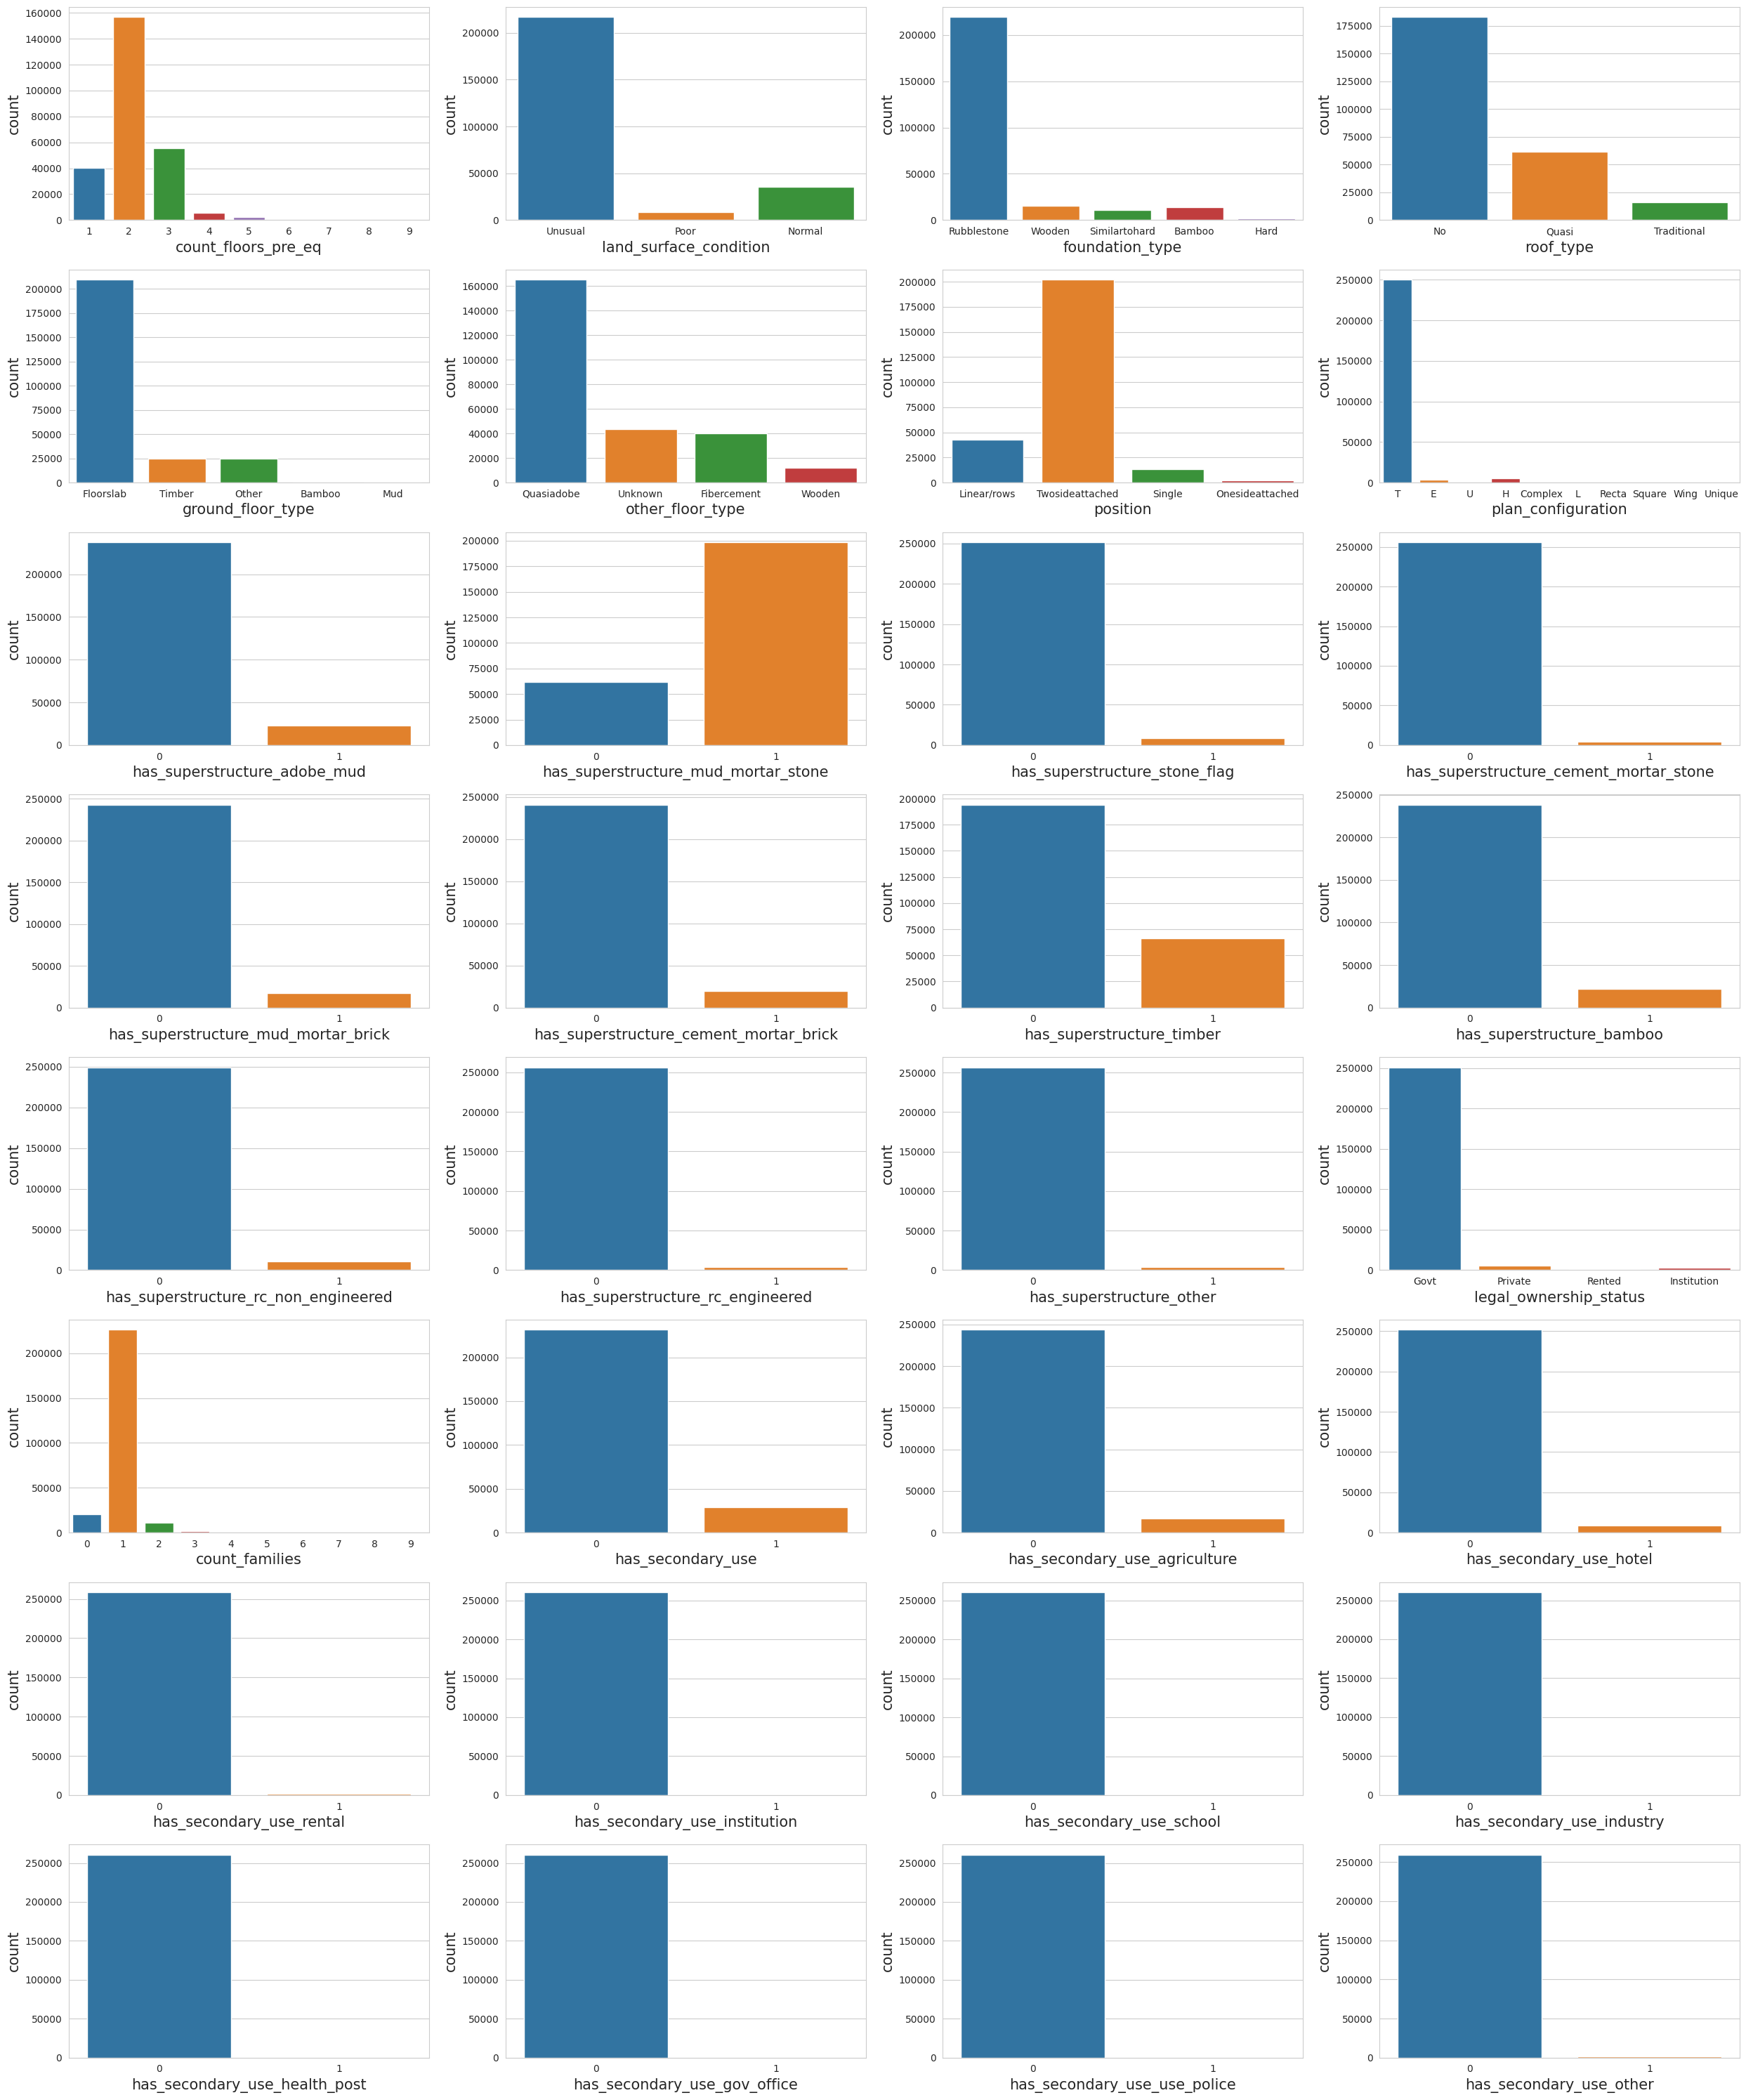

In [ ]:
# We are plotting countplot of categorical features.

sns.set_style('whitegrid')
plt.figure(figsize=(25,30))
i=1
for j in cats.columns:
    plt.subplot(8,4,i)
    sns.countplot(data=cats,x=j)
    sns
    i+=1
    plt.xlabel(j,fontsize=15)
    plt.ylabel('count',fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
 # Calculation of Percentages of value counts.

for i in cats:
    totalcount = cats[i].count()
    valuecount = cats[i].value_counts()
    percentage = (valuecount/totalcount)*100
    print(round(percentage,2),'\n')

2    60.10
3    21.34
1    15.52
4     2.08
5     0.86
6     0.08
7     0.01
8     0.00
9     0.00
Name: count_floors_pre_eq, dtype: float64 

Unusual    83.18
Normal     13.63
Poor        3.19
Name: land_surface_condition, dtype: float64 

Rubblestone      84.11
Wooden            5.80
Bamboo            5.47
Similartohard     4.06
Hard              0.56
Name: foundation_type, dtype: float64 

No             70.16
Quasi          23.63
Traditional     6.21
Name: roof_type, dtype: float64 

Floorslab    80.44
Timber        9.55
Other         9.44
Bamboo        0.39
Mud           0.19
Name: ground_floor_type, dtype: float64 

Quasiadobe     63.42
Unknown        16.67
Fibercement    15.29
Wooden          4.62
Name: other_floor_type, dtype: float64 

Twosideattached    77.55
Linear/rows        16.46
Single              5.10
Onesideattached     0.90
Name: position, dtype: float64 

T          95.96
H           2.18
E           1.40
U           0.13
L           0.12
Recta       0.10
Unique    

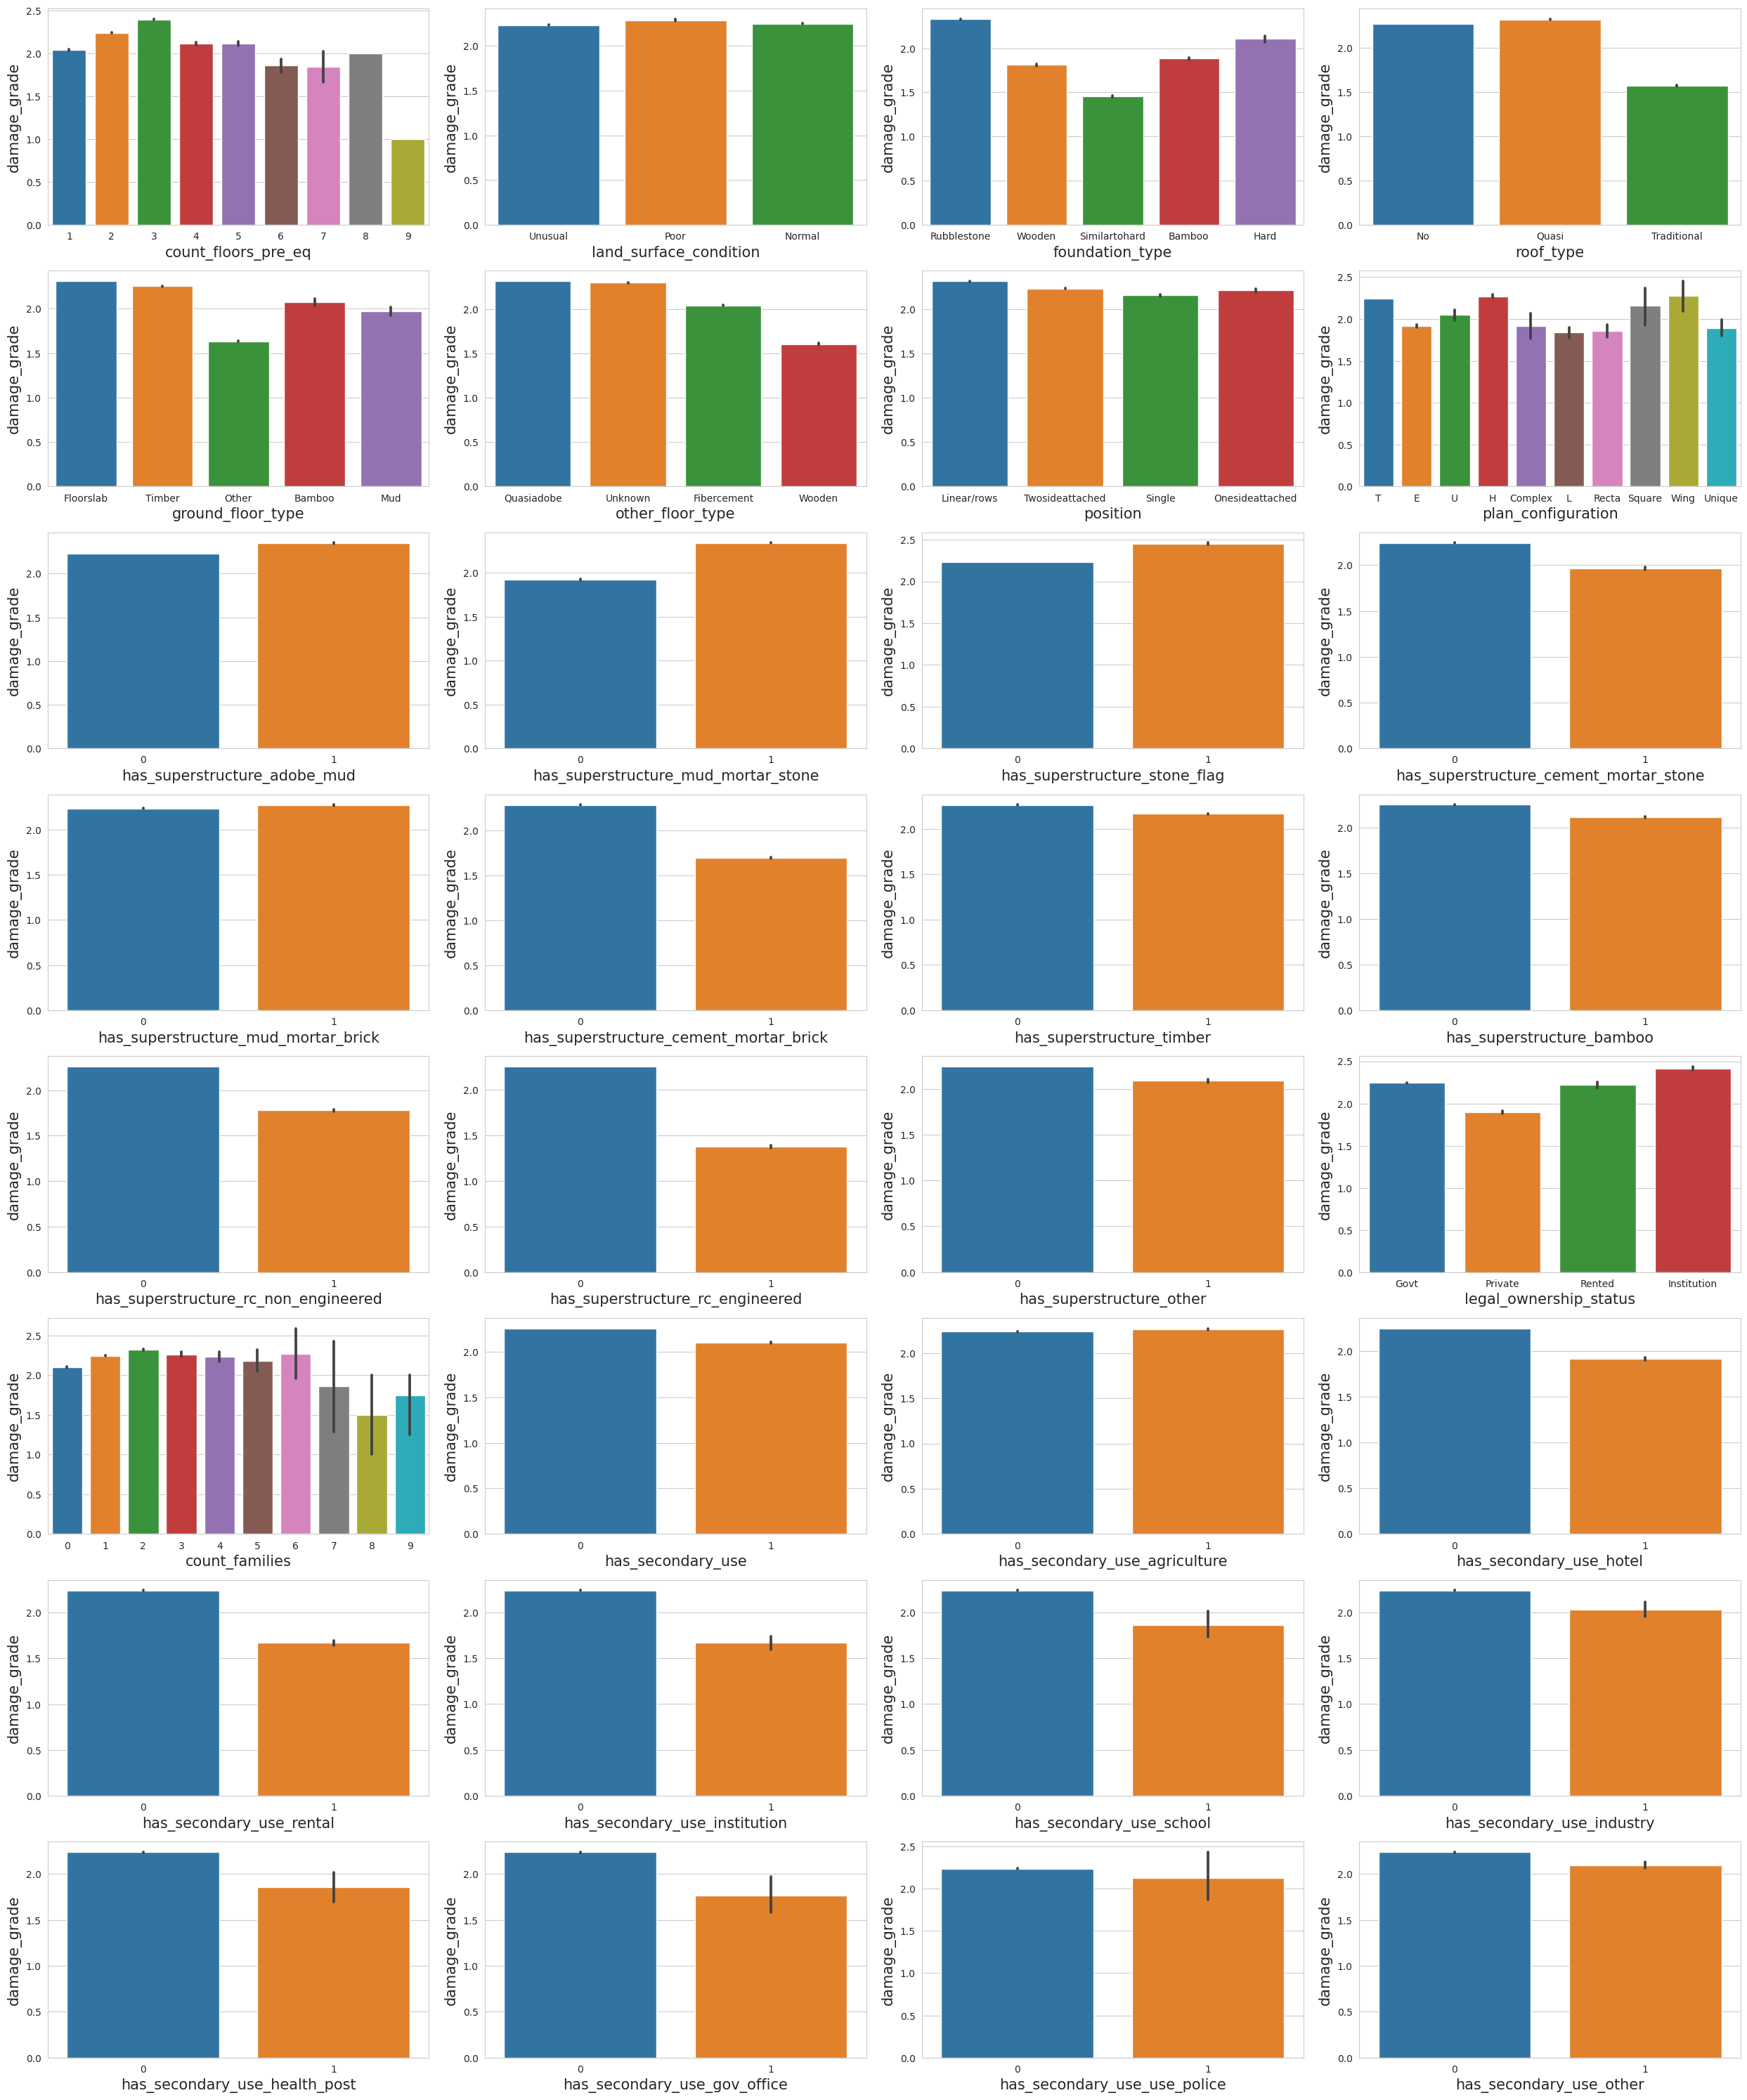

In [ ]:
# Plotting Barplot on basis of target(damage grade).

plt.figure(figsize=(25,30))
i=1
for j in cats.columns:
    plt.subplot(8,4,i)
    sns.barplot(data=cats,x=j,y=df['damage_grade'])
    i+=1
    plt.xlabel(j,fontsize=15)
    plt.ylabel('damage_grade',fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
print('If both features have 1 value')
print(cats[(cats['has_superstructure_rc_engineered']==1) & (cats['has_superstructure_rc_non_engineered']==1)].shape)
print('If both features have 0 value')
print(cats[(cats['has_superstructure_rc_engineered']==0) & (cats['has_superstructure_rc_non_engineered']==0)].shape)

If both features have 1 value
(95, 32)
If both features have 0 value
(245464, 32)


### Analysis from Countplot and Barplot for Categorical data

We are considering damage grade into 3 categories (0 to 1) count as 1, (1 to 2) count as 2, and (2 to 3) count as 3 from barplot.

We are Dropping 22 features from categorical data because:

1) 'count_floors_pre_eq': We analyse that  1st floor building have more damage than 6/7 th floor building which does not make any sense from barplot.

2) 'land_surface_condition': We analyse that All Unusual,Poor and Normal have almost same damgae grade level from barplot.

3) 'position': We analyse that All Twosideattached, Linear/rows, Single and Onesideattached have almost same damgae grade level from barplot.

4) 'has_superstructure_adobe_mud': We analyse that 0 and 1 have almost same damgae grade level from barplot.

5) 'has_superstructure_stone_flag': We analyse that 0 and 1 have almost same damgae grade level from barplot.

6) 'has_superstructure_mud_mortar_brick': We analyse that 0 and 1 have almost same damgae grade level from barplot.

7) 'has_superstructure_timber' : We analyse that 0 and 1 have almost same damgae grade level from barplot.

8) 'has_superstructure_bamboo': We analyse that 0 and 1 have almost same damgae grade level from barplot.

9) 'has_superstructure_other': We analyse that 0 and 1 have almost same damgae grade level from barplot.

10) 'has_secondary_use': We analyse that 0 and 1 have almost same damgae grade level from barplot.

11) 'has_secondary_use_agriculture': We analyse that 0 and 1 have almost same damgae grade level from barplot.

12) 'has_secondary_use_industry': We analyse that 0 and 1 have almost same damgae grade level from barplot.

13) 'has_secondary_use_use_police': We analyse that 0 and 1 have almost same damgae grade level from barplot.

14) 'has_secondary_use_other': We analyse that 0 and 1 have almost same damgae grade level from barplot.

15) 'has_superstructure_cement_mortar_stone': From count plot, We analyse that 0(98.18% ) and 1(1.82%), so we are considering it as constant feature.

16) 'has_secondary_use_rental': From count plot, Here also we analyse data biasness towards  0. It have 0(99.19%) and 1(0.81%). So this one is also constant feature.

17) 'has_secondary_use_institution': From count plot, It have 0(99.91%) and 1(0.09%) so this is also treated as constant feature.

18) 'has_secondary_use_school': From count plot, It have 0(99.96%) and 1(0.04%) so this is also treated as constant feature.

19) 'has_secondary_use_health_post': From count plot, It have 0(99.98%) and 1(0.02%) so this is also treated as constant feature.

20) 'has_secondary_use_gov_office': From count plot, It have 0(99.99%) and 1(0.01%) so this is also treated as constant feature.

21) & 22) 'has_superstructure_rc_non_engineered' & 'has_superstructure_rc_engineered': We analyse that total number of (245464/260601) rows have same value of 0 in engineered and non-engineered features. So we cannot consider these features since it does not make any sense if engineered is 0 then non engineered must be 1, but here this logic does not apply. Therefore we are removing these two.

In [ ]:
cats.drop(['count_floors_pre_eq','land_surface_condition','position','has_superstructure_adobe_mud','has_superstructure_stone_flag','has_superstructure_mud_mortar_brick','has_superstructure_timber'
,'has_superstructure_bamboo','has_superstructure_other','has_secondary_use','has_secondary_use_agriculture','has_secondary_use_industry'
,'has_secondary_use_use_police','has_secondary_use_other','has_superstructure_cement_mortar_stone','has_secondary_use_rental',
'has_secondary_use_institution','has_secondary_use_school','has_secondary_use_health_post','has_secondary_use_gov_office','has_superstructure_rc_non_engineered'
,'has_superstructure_rc_engineered'],axis=1,inplace=True)

In [ ]:
print('After dropping:',cats.shape)
cats

After dropping: (260601, 10)


,foundation_type,roof_type,ground_floor_type,other_floor_type,plan_configuration,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,legal_ownership_status,count_families,has_secondary_use_hotel
0,Rubblestone,No,Floorslab,Quasiadobe,T,1,0,Govt,1,0
1,Rubblestone,No,Timber,Quasiadobe,T,1,0,Govt,1,0
2,Rubblestone,No,Floorslab,Unknown,T,1,0,Govt,1,0
3,Rubblestone,No,Floorslab,Unknown,T,1,0,Govt,1,0
4,Rubblestone,No,Floorslab,Unknown,T,0,0,Govt,1,0
...,...,...,...,...,...,...,...,...,...,...
260596,Rubblestone,No,Floorslab,Fibercement,H,1,0,Govt,1,0
260597,Rubblestone,No,Floorslab,Quasiadobe,T,1,0,Govt,1,0
260598,Rubblestone,Quasi,Floorslab,Quasiadobe,T,1,0,Govt,1,0
260599,Rubblestone,Traditional,Other,Wooden,T,0,1,Govt,1,0


### Univariate and Bivariate analysis of Numerical data

In [ ]:
nume

,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,height_percentage
0,6,487,12198,30,6,5
1,8,900,2812,10,8,7
2,21,363,8973,10,5,5
3,22,418,10694,10,6,5
4,11,131,1488,30,8,9
...,...,...,...,...,...,...
260596,25,1335,1621,55,6,3
260597,17,715,2060,0,6,5
260598,17,51,8163,55,6,7
260599,26,39,1851,10,14,6


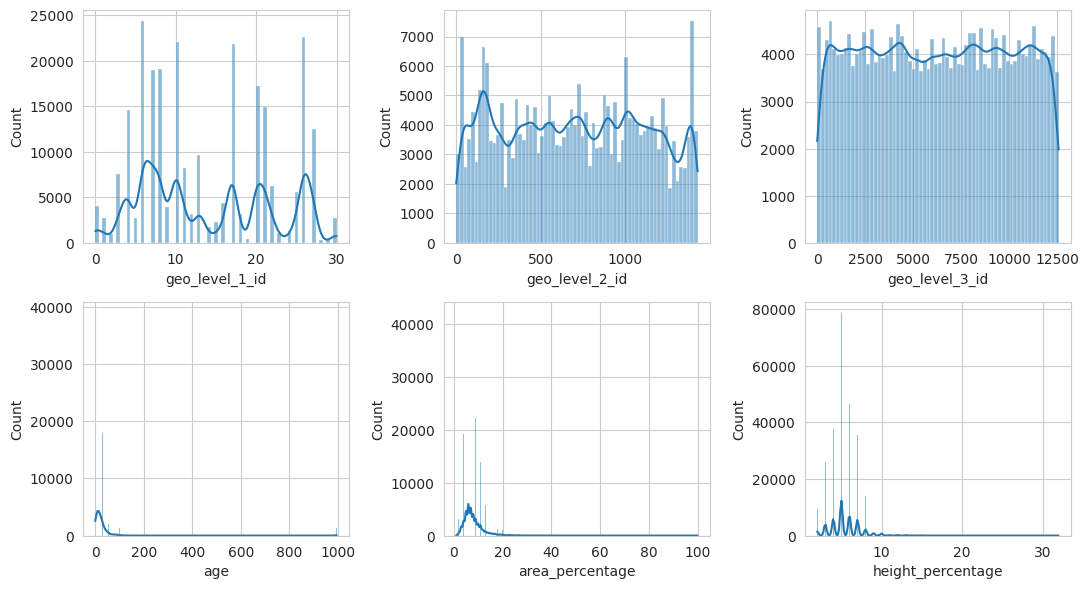

In [ ]:
#Plotting Histogram of Numerical Data.

plt.figure(figsize=(11,6))
i=1
for j in nume.columns:
    plt.subplot(2,3,i)
    sns.histplot(data=nume,x=j,kde=True)
    i+=1
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
for i in nume:
    kurtosis=stats.kurtosis(nume[i],fisher=True)
    skew=stats.skew(nume[i])
    print(f"Kurtosis & skew for {i}:{kurtosis,skew}")

Kurtosis & skew for geo_level_1_id:(-1.2132485309653336, 0.2725287861219406)
Kurtosis & skew for geo_level_2_id:(-1.1882327012668195, 0.028957214715142864)
Kurtosis & skew for geo_level_3_id:(-1.213896239094119, 0.00039350982486125856)
Kurtosis & skew for age:(157.2451962220758, 12.192424039649492)
Kurtosis & skew for area_percentage:(30.43765092015196, 3.5260620183257907)
Kurtosis & skew for height_percentage:(14.318228412197676, 1.808251348936324)


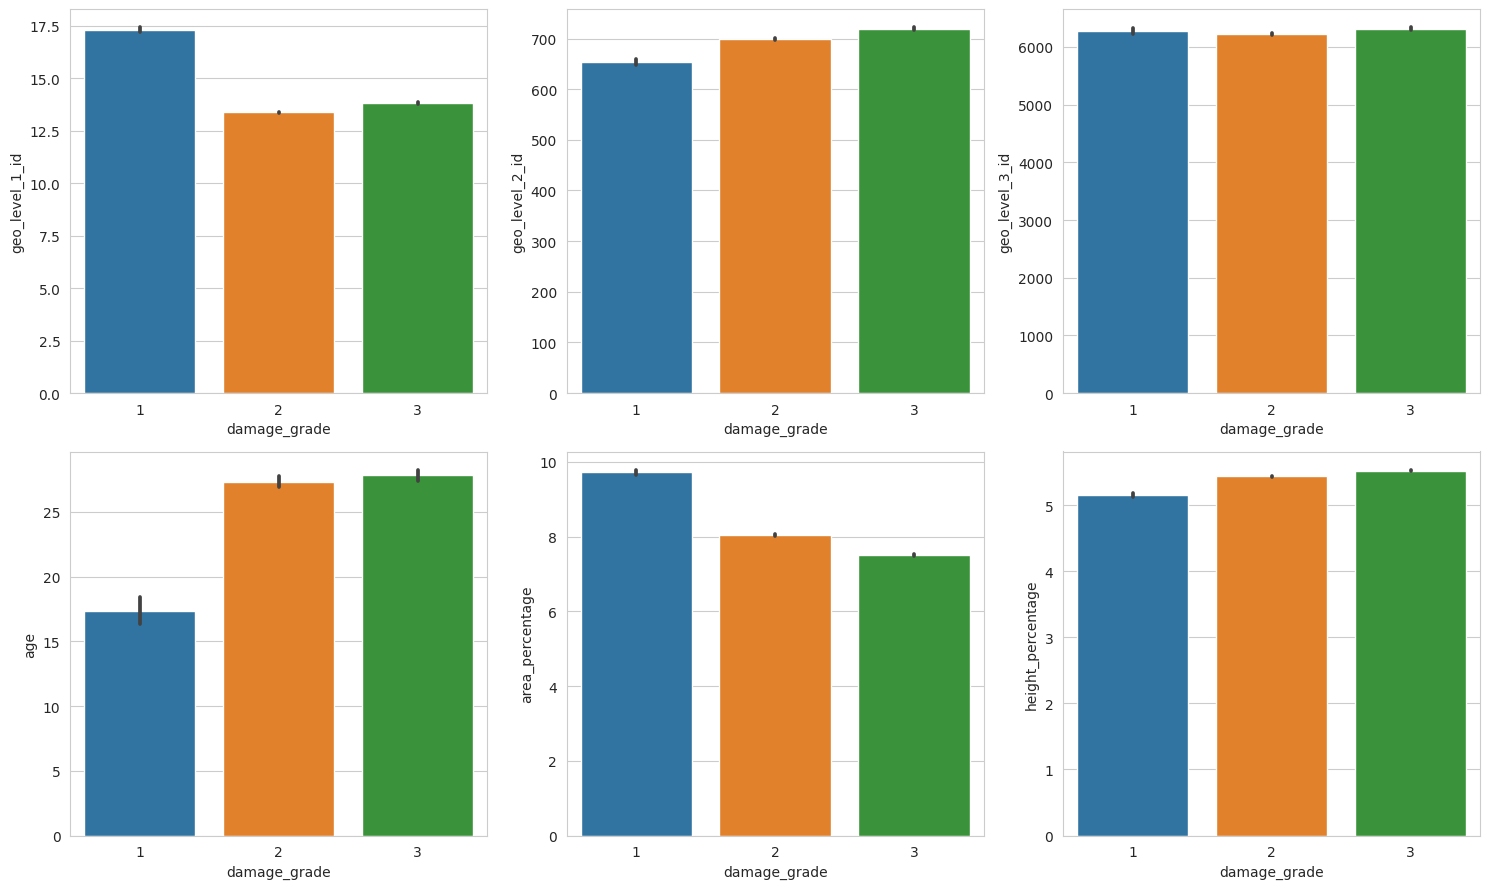

In [ ]:
# Plotting Barplot of Numerical data

plt.figure(figsize=(15,9))
i=1
for j in nume.columns:
    plt.subplot(2,3,i)
    sns.barplot(data=nume,x=df['damage_grade'],y=j)
    i+=1
plt.tight_layout()
plt.show()

#### Analysis from Countplot and Barplot for Numerical data

We did not found any significant information from the barplot.
From histogram we can say that age,area_percentage and height_percentage are showing skewness in nature as we can see their skewness value
and kurtosis value which does not lies between -1 to +1. So for this we have to check for outliers from boxplot and then remove it.

In [ ]:
# Before removing outliers we have to merge categorical, numerical data, and damage grade into final data as df3.

df3=pd.concat([nume,cats],axis=1)
df3['damage_grade'] = df['damage_grade']
df3


,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,height_percentage,foundation_type,roof_type,ground_floor_type,other_floor_type,plan_configuration,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,legal_ownership_status,count_families,has_secondary_use_hotel,damage_grade
0,6,487,12198,30,6,5,Rubblestone,No,Floorslab,Quasiadobe,T,1,0,Govt,1,0,3
1,8,900,2812,10,8,7,Rubblestone,No,Timber,Quasiadobe,T,1,0,Govt,1,0,2
2,21,363,8973,10,5,5,Rubblestone,No,Floorslab,Unknown,T,1,0,Govt,1,0,3
3,22,418,10694,10,6,5,Rubblestone,No,Floorslab,Unknown,T,1,0,Govt,1,0,2
4,11,131,1488,30,8,9,Rubblestone,No,Floorslab,Unknown,T,0,0,Govt,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,55,6,3,Rubblestone,No,Floorslab,Fibercement,H,1,0,Govt,1,0,2
260597,17,715,2060,0,6,5,Rubblestone,No,Floorslab,Quasiadobe,T,1,0,Govt,1,0,3
260598,17,51,8163,55,6,7,Rubblestone,Quasi,Floorslab,Quasiadobe,T,1,0,Govt,1,0,3
260599,26,39,1851,10,14,6,Rubblestone,Traditional,Other,Wooden,T,0,1,Govt,1,0,2


--------
## **Preprocessing**

In [ ]:
df3.isnull().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
age                                       0
area_percentage                           0
height_percentage                         0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
plan_configuration                        0
has_superstructure_mud_mortar_stone       0
has_superstructure_cement_mortar_brick    0
legal_ownership_status                    0
count_families                            0
has_secondary_use_hotel                   0
damage_grade                              0
dtype: int64

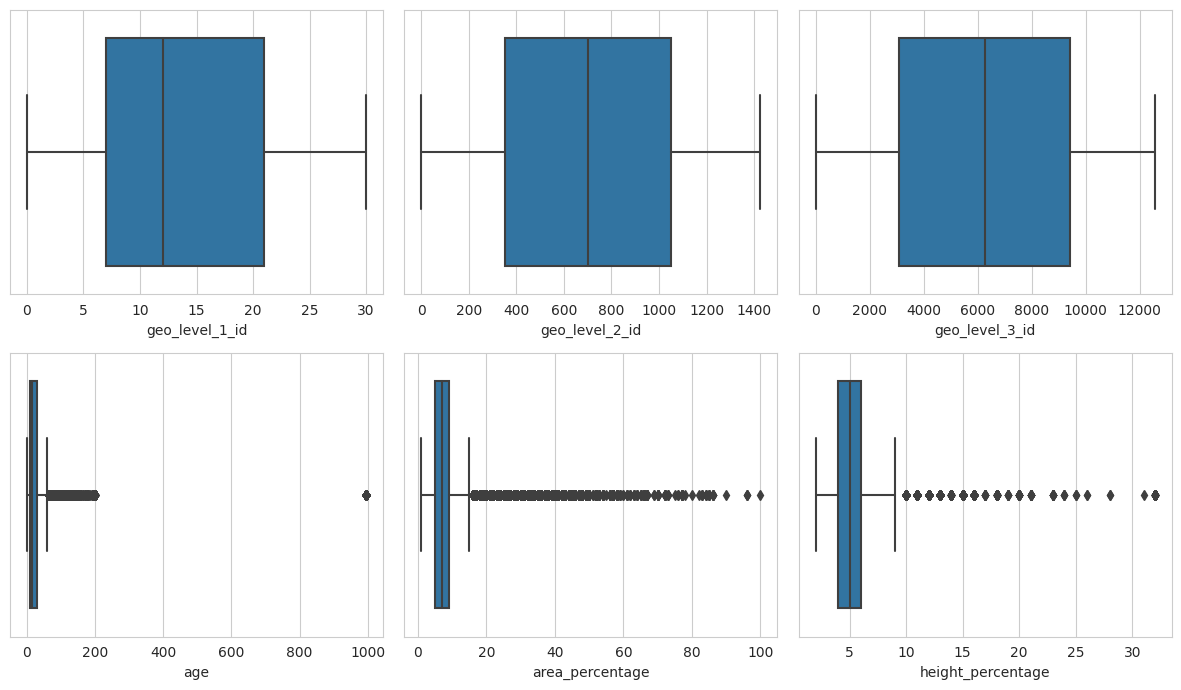

In [ ]:
# Now we will check for outliers for numerical data only and remove unnecessary rows from final df3

plt.figure(figsize=(12,7))
i=1
for j in nume.columns:
    plt.subplot(2,3,i)
    sns.boxplot(data=nume,x=j)
    i+=1
plt.tight_layout()
plt.show()

In [ ]:
# Age : from the above plot we analyse that datapoints above 800 are considered as an outliers.
df3.drop(df3[df3['age']>800].index,inplace=True,axis=0)
# Area_percentage: from the above plot we analyse that most of the datapoints are between 0 to 85, so we consider others as an outliers.
df3.drop(df3[df3['area_percentage']>85].index,inplace=True,axis=0)
# Height_percentage: from the above plot we analyse that most of the datapoints are between 0 to 26, so we consider others as an outliers.
df3.drop(df3[df3['height_percentage']>26].index,inplace=True,axis=0)

# So overall we removed 1478 rows which are only 0.567% from entire dataset

In [ ]:
df3.shape

(259123, 17)

### Mapping

In [ ]:
# We done mapping in this way such that we prioritise unique value of every features from low damage grade have min value start
# with 0 and high damage grade have max value.

df3['foundation_type'].replace({'Rubblestone':4,'Hard':3,'Bamboo':2,'Wooden':1,'Similartohard':0},inplace=True)
df3['roof_type'].replace({'Quasi':2,'No':1,'Traditional':0},inplace=True)
df3['ground_floor_type'].replace({'Floorslab':4,'Timber':3,'Bamboo':2,'Mud':1,'Other':0},inplace=True)
df3['other_floor_type'].replace({'Quasiadobe':3,'Unknown':2,'Fibercement':1,'Wooden':0},inplace=True)
df3['plan_configuration'].replace({'Wing':9,'H':8,'T':7,'Square':6,'U':5,'Complex':4,'E':3,'Unique':2,'Recta':1,'L':0},inplace=True)
df3['legal_ownership_status'].replace({'Institution':3,'Govt':2,'Rented':1,'Private':0},inplace=True)

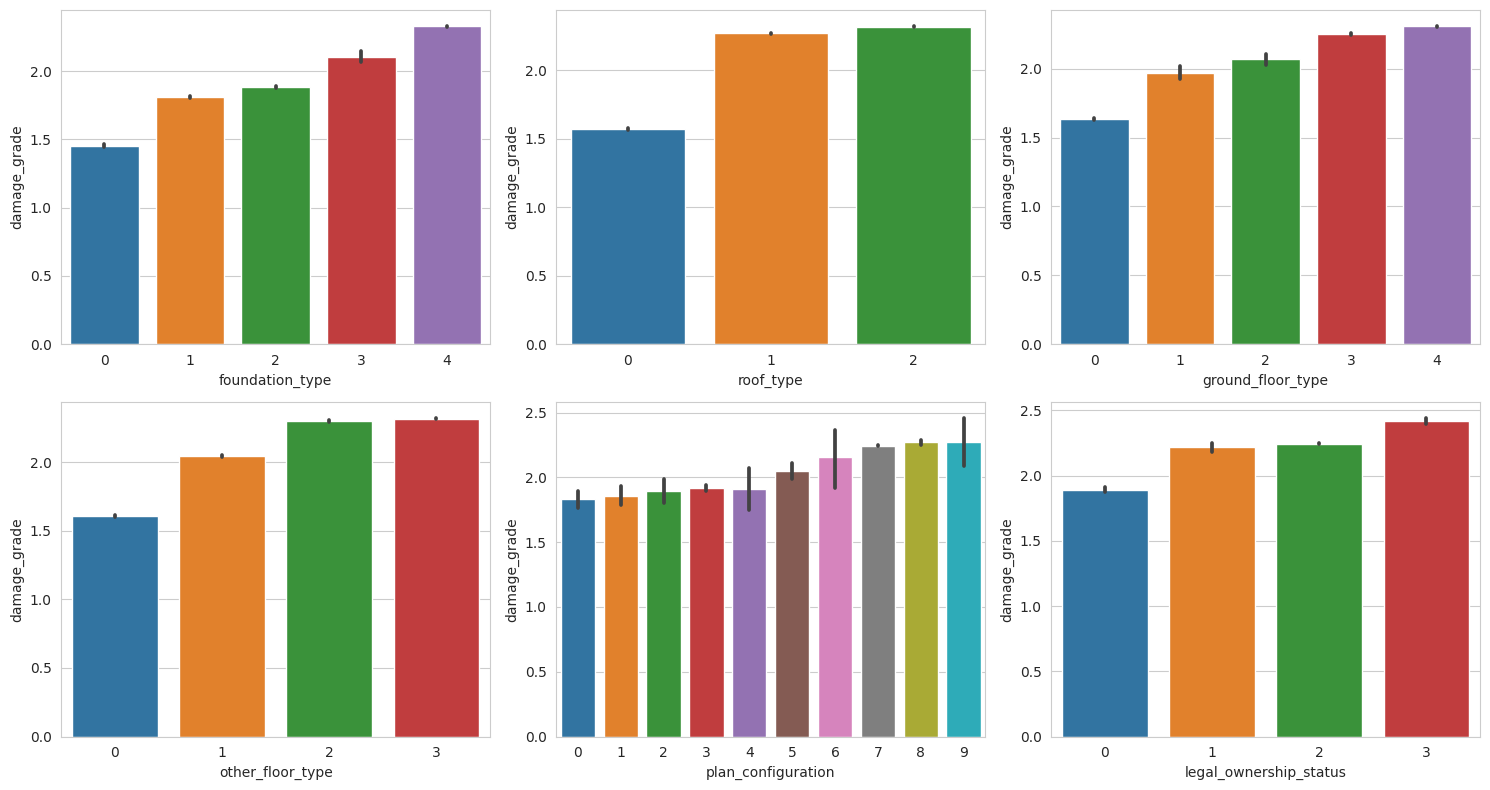

In [ ]:
# After mapping we can see in graph how we have done it in increasing order based on damage grade.

map=df3[['foundation_type','roof_type','ground_floor_type','other_floor_type','plan_configuration','legal_ownership_status']]
i=1
plt.figure(figsize=(15,8))
for j in map.columns:
  plt.subplot(2,3,i)
  sns.barplot(data=df3,x=j,y='damage_grade')
  i+=1
plt.tight_layout()
plt.show()

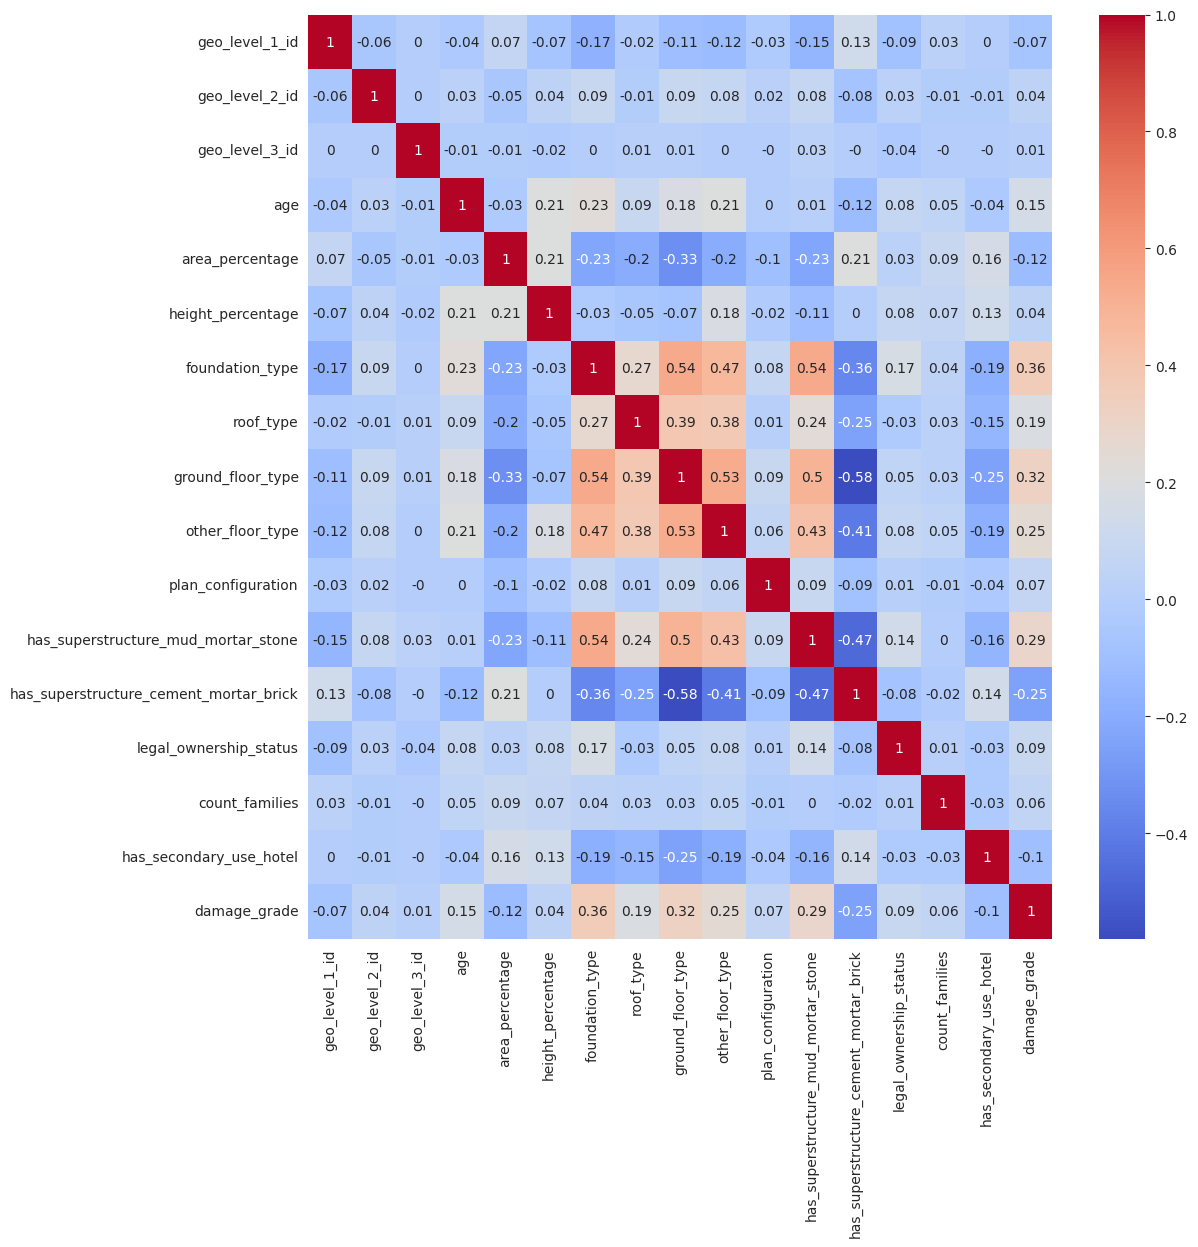

In [ ]:
# Heatmap : To find the correlation between features.

plt.figure(figsize=(12,12))
sns.heatmap(round(df3.corr(),2),annot=True,cmap='coolwarm')
plt.show()

# Correlation between features is maximum 79%, so we cannot remove any features, since it is not greater than 90% correlation.

--------
## **Model Creation**
1) Logistic Regression

2) K-Nearest Neighbors

3) Decision Trees

4) Random Forest

5) Gradient Boosting

6) XG-Boosting

In [ ]:
X=df3.drop('damage_grade',axis=1)
Y=df3.damage_grade
print('X shape:',X.shape,'&','Y shape:',Y.shape)

X shape: (259123, 16) & Y shape: (259123,)


In [ ]:
# We have to scale entire dataset between 0 to 1 that is MinMAx scaling because there are some features like age which should not goes
# below zero. After scaling we got dataset into array format so we converted that dataset into dataframe also.

MMS=MinMaxScaler()
Xscaled=MMS.fit_transform(X)
Xscaled_df=pd.DataFrame(data=Xscaled,columns=X.columns)
Xscaled_df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,height_percentage,foundation_type,roof_type,ground_floor_type,other_floor_type,plan_configuration,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,legal_ownership_status,count_families,has_secondary_use_hotel
0,0.200000,0.341275,0.970637,0.15,0.059524,0.125000,1.0,0.5,1.00,1.000000,0.777778,1.0,0.0,0.666667,0.111111,0.0
1,0.266667,0.630694,0.223761,0.05,0.083333,0.208333,1.0,0.5,0.75,1.000000,0.777778,1.0,0.0,0.666667,0.111111,0.0
2,0.700000,0.254380,0.714013,0.05,0.047619,0.125000,1.0,0.5,1.00,0.666667,0.777778,1.0,0.0,0.666667,0.111111,0.0
3,0.733333,0.292922,0.850959,0.05,0.059524,0.125000,1.0,0.5,1.00,0.666667,0.777778,1.0,0.0,0.666667,0.111111,0.0
4,0.366667,0.091801,0.118405,0.15,0.083333,0.291667,1.0,0.5,1.00,0.666667,0.777778,0.0,0.0,0.666667,0.111111,0.0


In [ ]:
# We took 85% dataset for training purpose and remaining 15% for testing purpose because our dataset is very large.

Xtrain,Xtest,Ytrain,Ytest = train_test_split(Xscaled,Y,random_state=42,test_size=0.15)
print('Xtrain shape:',Xtrain.shape, '&', 'Xtest shape:','&',Xtest.shape)

Xtrain shape: (220254, 16) & Xtest shape: & (38869, 16)


### **1st Model : Logistic Regression**

In [ ]:
# We apply Logistic regression model with multilcass as multinomial and solver optimization as 'sag' (Stochastic Average Gradient Descent)

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class='multinomial',solver='sag', random_state=42)
LR.fit(Xtrain,Ytrain)

LogisticRegression(multi_class='multinomial', random_state=42, solver='sag')

In [ ]:
# Prediction of test data:

Ypred=LR.predict(Xtest)
print(classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           1       0.55      0.27      0.36      3671
           2       0.58      0.92      0.72     22106
           3       0.51      0.08      0.13     13092

    accuracy                           0.58     38869
   macro avg       0.55      0.42      0.40     38869
weighted avg       0.55      0.58      0.49     38869



In [ ]:
# Now we are doing smoting for comparision of results.

from imblearn.over_sampling import SMOTE
smt = SMOTE()
Xsmt,Ysmt = smt.fit_resample(Xtrain,Ytrain)

print('Xtrain before smoting',Xtrain.shape)
print(Ytrain.value_counts())
print('Xsmt after smoting',Xsmt.shape)
print(Ysmt.value_counts())

Xtrain before smoting (220254, 16)
2    125323
3     73661
1     21270
Name: damage_grade, dtype: int64
Xsmt after smoting (375969, 16)
2    125323
3    125323
1    125323
Name: damage_grade, dtype: int64


In [ ]:
LR = LogisticRegression(multi_class='multinomial',solver='sag',random_state=42)
LR.fit(Xsmt,Ysmt)

LogisticRegression(multi_class='multinomial', random_state=42, solver='sag')

In [ ]:
# Prediction of test data

Ypred=LR.predict(Xtest)
print(classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           1       0.35      0.69      0.46      3671
           2       0.66      0.30      0.41     22106
           3       0.43      0.70      0.53     13092

    accuracy                           0.47     38869
   macro avg       0.48      0.57      0.47     38869
weighted avg       0.55      0.47      0.46     38869



In [ ]:
# Result of Logistic Regression
data = [['Before Smoting','Accuracy : 58% (BEST)'],['After Smoting','Accuracy : 47%']]
head = ['Result','Logistic Regression']
print(tabulate(data,headers=head, tablefmt='grid'))

# Before smoting accuracy is 58% and after smoting accuracy is 47%. So we are not going to use smoting for further models.

+----------------+-----------------------+
| Result         | Logistic Regression   |
+================+=======================+
| Before Smoting | Accuracy : 58% (BEST) |
+----------------+-----------------------+
| After Smoting  | Accuracy : 47%        |
+----------------+-----------------------+


### **2nd Model : K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Find the n neighbors:
accuracy=[]
error_rate=[]
for i in range(1,12):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(Xtrain,Ytrain)
    Ypred=KNN.predict(Xtest)
    accuracy.append(accuracy_score(Ytest,Ypred))
    error_rate.append(np.mean(Ytest!=Ypred))

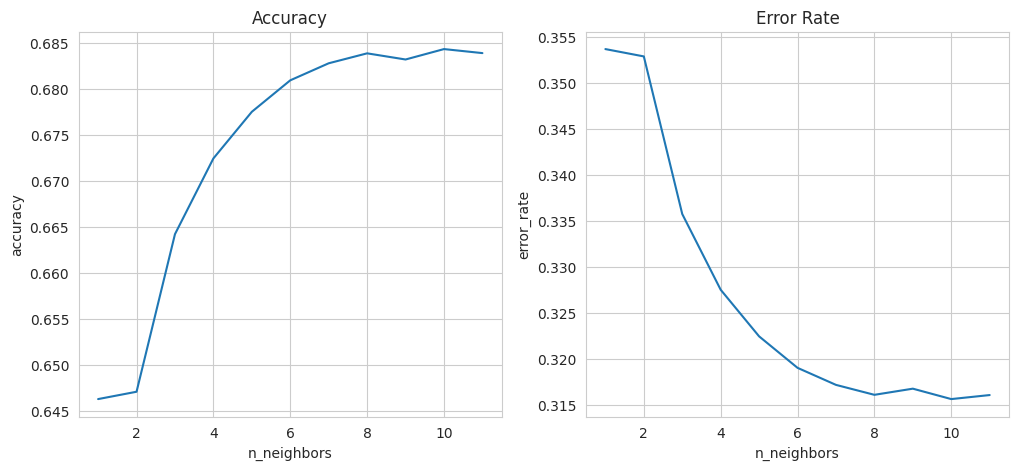

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(1,12),accuracy)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(range(1,12),error_rate)
plt.xlabel('n_neighbors')
plt.ylabel('error_rate')
plt.title('Error Rate')
plt.show()

In [ ]:
# From the above graph n_neighbors=8 gives optimum level of accuracy with minimum error rate.

KNN=KNeighborsClassifier(n_neighbors=8)
KNN.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
# Prediction of test data

Ypred=KNN.predict(Xtest)
print(classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           1       0.55      0.48      0.51      3671
           2       0.70      0.81      0.75     22106
           3       0.70      0.52      0.60     13092

    accuracy                           0.68     38869
   macro avg       0.65      0.61      0.62     38869
weighted avg       0.68      0.68      0.68     38869



In [ ]:
# Result of KNN
data = [['Testing Accuracy','68%']]
head = ['Result','KNN']
print(tabulate(data,headers=head, tablefmt='grid'))

+------------------+-------+
| Result           | KNN   |
+==================+=======+
| Testing Accuracy | 68%   |
+------------------+-------+


### **3rd Model : Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [ ]:
# Prediction of test data

Ypred = DTC.predict(Xtest)
print(classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           1       0.48      0.52      0.50      3671
           2       0.72      0.71      0.71     22106
           3       0.62      0.62      0.62     13092

    accuracy                           0.66     38869
   macro avg       0.61      0.62      0.61     38869
weighted avg       0.66      0.66      0.66     38869



In [ ]:
# Checking overfitting of model or not from training dataset

Ytrainpred = DTC.predict(Xtrain)
print(classification_report(Ytrain,Ytrainpred))

# It is overfitted because training accuracy is 98% while testing accuracy gives only 66%, so we need to do hyperparameter tuning.

              precision    recall  f1-score   support

           1       0.96      0.99      0.98     21270
           2       0.97      0.99      0.98    125323
           3       0.99      0.95      0.97     73661

    accuracy                           0.98    220254
   macro avg       0.97      0.98      0.98    220254
weighted avg       0.98      0.98      0.98    220254



In [ ]:
# # Hyperparameter of Decision Tree : We define RandomsearchCV for faster result, and set the parameters range accordingly after that
# #                                   we make grid and then fit the model into it, and then predict the testing accuracy.

# from sklearn.model_selection import RandomizedSearchCV
# parameter = {"criterion":("gini","entropy"),"splitter":("best","random"),"max_depth":(list(range(8, 18))),
#              "min_samples_split":(list(range(2,6))),"min_samples_leaf":(list(range(1, 5)))}
# DTC=DecisionTreeClassifier()
# Grid=RandomizedSearchCV(estimator=DTC,param_distributions=parameter,scoring="f1",cv=3,random_state=42)
# Grid.fit(Xtrain,Ytrain)

In [ ]:
# print('Best parameters:',Grid.best_params_)
print('Best parameters are: splitter= best, min_samples_split= 3, min_samples_leaf= 4, max_depth= 15, criterion= entropy')

Best parameters are: splitter= best, min_samples_split= 3, min_samples_leaf= 4, max_depth= 15, criterion= entropy


In [ ]:
# We put these best parameter and then train model again.
DTC = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=15,min_samples_split=3,min_samples_leaf=4)
DTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=3)

In [ ]:
# Prediction of test data

Ypred = DTC.predict(Xtest)
print(classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           1       0.60      0.46      0.52      3671
           2       0.71      0.82      0.76     22106
           3       0.71      0.56      0.62     13092

    accuracy                           0.70     38869
   macro avg       0.67      0.61      0.63     38869
weighted avg       0.70      0.70      0.69     38869



In [ ]:
# Checking overfitting of model or not from training dataset.

Ypred = DTC.predict(Xtrain)
print(classification_report(Ytrain,Ypred))

# It is not overfitting because training accuracy is 74%, and testing accuracy is 70%.

              precision    recall  f1-score   support

           1       0.72      0.55      0.63     21270
           2       0.73      0.85      0.79    125323
           3       0.75      0.59      0.66     73661

    accuracy                           0.74    220254
   macro avg       0.73      0.67      0.69    220254
weighted avg       0.74      0.74      0.73    220254



In [ ]:
# Result of Decision Tree
data = [['Before Hyperparameter','66%','98%','Yes'],['After Hyperparameter','70% (BEST)','74%','No']]
head = ['Result','Testing Accuracy','Training Accuracy','Overfitted']
print(tabulate(data,headers=head, tablefmt='grid'))

+-----------------------+--------------------+---------------------+--------------+
| Result                | Testing Accuracy   | Training Accuracy   | Overfitted   |
+=======================+====================+=====================+==============+
| Before Hyperparameter | 66%                | 98%                 | Yes          |
+-----------------------+--------------------+---------------------+--------------+
| After Hyperparameter  | 70% (BEST)         | 74%                 | No           |
+-----------------------+--------------------+---------------------+--------------+


### **4th Model : Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100)
RFC.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [ ]:
# Prediction of test data

Ypred = RFC.predict(Xtest)
print(classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           1       0.64      0.48      0.55      3671
           2       0.73      0.82      0.77     22106
           3       0.72      0.62      0.66     13092

    accuracy                           0.72     38869
   macro avg       0.69      0.64      0.66     38869
weighted avg       0.72      0.72      0.71     38869



In [ ]:
# Checking overfitting of model or not from training dataset.

Ytrainpred = RFC.predict(Xtrain)
print(classification_report(Ytrain,Ytrainpred))

# It is overfitted because training accuracy is 98% while testing accuracy gives only 72%, so we need to do hyperparameter tuning.

              precision    recall  f1-score   support

           1       0.98      0.97      0.98     21270
           2       0.98      0.98      0.98    125323
           3       0.97      0.97      0.97     73661

    accuracy                           0.98    220254
   macro avg       0.98      0.97      0.98    220254
weighted avg       0.98      0.98      0.98    220254



In [ ]:
# # Hyperparameter of Random Forest: We define RandomsearchCV for faster result, and set the parameters range accordingly after that
# #                                  we make grid and then fit the model into it, and then predict the testing accuracy.

# from sklearn.model_selection import RandomizedSearchCV
# parameters={'n_estimators':[100,200,300,400,500,600,700,800,900,1000],'max_features':['auto','sqrt'],'bootstrap':[True,False],
#             'max_depth':(list(range(8,18))),'min_samples_split':(list(range(2,6))),'min_samples_leaf':(list(range(1,5)))}

# RFC=RandomForestClassifier()
# Grid= RandomizedSearchCV(estimator=RFC,param_distributions=parameters,n_iter=100,n_jobs=-1,scoring='f1',cv=3,random_state=42)
# Grid.fit(Xtrain,Ytrain)

In [ ]:
# # From hyperparameter tuning we got these best parameters.
# print(Grid.best_params_)

print('Best parameter are: n_estimators= 600, min_samples_split= 4, min_samples_leaf= 4, max_features= sqrt, max_depth = 17, bootstrap= False')

Best parameter are: n_estimators= 600, min_samples_split= 4, min_samples_leaf= 4, max_features= sqrt, max_depth = 17, bootstrap= False


In [ ]:
# We put these best parameter and then train model again.
RFC = RandomForestClassifier(n_estimators=600,min_samples_split=4,min_samples_leaf=4,max_features='sqrt',max_depth=17,bootstrap=False)
RFC.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=False, max_depth=17, min_samples_leaf=4,
                       min_samples_split=4, n_estimators=600)

In [ ]:
# Prediction of test data

Ypredict=RFC.predict(Xtest)
print(classification_report(Ytest,Ypredict))

              precision    recall  f1-score   support

           1       0.70      0.40      0.51      3671
           2       0.70      0.88      0.78     22106
           3       0.76      0.51      0.61     13092

    accuracy                           0.71     38869
   macro avg       0.72      0.60      0.63     38869
weighted avg       0.72      0.71      0.70     38869



In [ ]:
# Checking overfitting of model or not from training dataset.

Ytrainpredict=RFC.predict(Xtrain)
print(classification_report(Ytrain,Ytrainpredict))

# It is not overfitting because training accuracy is 75%, and testing accuracy is 71%.

              precision    recall  f1-score   support

           1       0.86      0.53      0.66     21270
           2       0.73      0.91      0.81    125323
           3       0.80      0.56      0.66     73661

    accuracy                           0.75    220254
   macro avg       0.80      0.66      0.71    220254
weighted avg       0.77      0.75      0.74    220254



In [ ]:
# Result of Random Forest
data = [['Before Hyperparameter','72%','98%','Yes'],['After Hyperparameter','71% (BEST)','75%','No']]
head = ['Result','Testing Accuracy','Training Accuracy','Overfitted']
print(tabulate(data,headers=head, tablefmt='grid'))

+-----------------------+--------------------+---------------------+--------------+
| Result                | Testing Accuracy   | Training Accuracy   | Overfitted   |
+=======================+====================+=====================+==============+
| Before Hyperparameter | 72%                | 98%                 | Yes          |
+-----------------------+--------------------+---------------------+--------------+
| After Hyperparameter  | 71% (BEST)         | 75%                 | No           |
+-----------------------+--------------------+---------------------+--------------+


### **5th Model : Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(Xtrain,Ytrain)

GradientBoostingClassifier()

In [ ]:
# Prediction of test data

Ypred=GBC.predict(Xtest)
print(classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           1       0.63      0.37      0.46      3671
           2       0.68      0.86      0.76     22106
           3       0.71      0.48      0.57     13092

    accuracy                           0.68     38869
   macro avg       0.67      0.57      0.60     38869
weighted avg       0.69      0.68      0.67     38869



In [ ]:
# Checking overfitting of model or not from training dataset.

Ytrainpred=GBC.predict(Xtrain)
print(classification_report(Ytrain,Ytrainpred))

# It is not overfitting because training accuracy is 68%, and testing accuracy is also 68%.

              precision    recall  f1-score   support

           1       0.64      0.37      0.47     21270
           2       0.68      0.85      0.75    125323
           3       0.71      0.48      0.57     73661

    accuracy                           0.68    220254
   macro avg       0.68      0.57      0.60    220254
weighted avg       0.68      0.68      0.67    220254



In [ ]:
# Result of Gradient Boosting
data = [['Testing Accuracy','68%(BEST)'],['Training Accuracy','68%']]
head = ['Result','Gradient Boosting']
print(tabulate(data,headers=head, tablefmt='grid'))

+-------------------+---------------------+
| Result            | Gradient Boosting   |
+===================+=====================+
| Testing Accuracy  | 68%(BEST)           |
+-------------------+---------------------+
| Training Accuracy | 68%                 |
+-------------------+---------------------+


### **6th Model : XG-Boosting**

In [ ]:
!pip install xgboost

In [ ]:
# We cannot apply XGboot model directly because target have 1,2,3 as output but xgboost model require it in this format 0,1,2 thats why we applied
# label encoder to change it, fit into the model and then convert it into original format and then print classification report.

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Ytrain_encoded = le.fit_transform(Ytrain)
Ytest_encoded = le.transform(Ytest)
XGBC = XGBClassifier(random_state=42)
XGBC.fit(Xtrain,Ytrain_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Prediction of test data

Ytestpred1 = XGBC.predict(Xtest)
Ytestpred2 = le.inverse_transform(Ytestpred1)
print(classification_report(Ytest,Ytestpred2))

              precision    recall  f1-score   support

           1       0.69      0.45      0.55      3671
           2       0.72      0.85      0.78     22106
           3       0.74      0.59      0.66     13092

    accuracy                           0.73     38869
   macro avg       0.72      0.63      0.66     38869
weighted avg       0.73      0.73      0.72     38869



In [ ]:
# Checking overfitting of model or not from training dataset.

Ytrainpred1 = XGBC.predict(Xtrain)
Ytrainpred2 = le.inverse_transform(Ytrainpred1)
print(classification_report(Ytrain,Ytrainpred2))

# It is not overfitting because training accuracy is 74%, and testing accuracy is also 73%.

              precision    recall  f1-score   support

           1       0.75      0.49      0.59     21270
           2       0.73      0.87      0.79    125323
           3       0.76      0.60      0.67     73661

    accuracy                           0.74    220254
   macro avg       0.75      0.65      0.69    220254
weighted avg       0.74      0.74      0.73    220254



In [ ]:
# Result of XG-Boosting
data = [['Testing Accuracy','73%(BEST)'],['Training Accuracy','74%']]
head = ['Result','XG-Boosting']
print(tabulate(data,headers=head, tablefmt='grid'))

+-------------------+---------------+
| Result            | XG-Boosting   |
+===================+===============+
| Testing Accuracy  | 73%(BEST)     |
+-------------------+---------------+
| Training Accuracy | 74%           |
+-------------------+---------------+


-------
## **Model Comparison Report**:

In [ ]:
data = [['XG-Boosting','73%','1st(BEST)'],['Random Forest','71%','2nd'],['Decision Tree','70%','3rd'],['Gradient Boosting','68%','4th'],
        ['K-Nearest Neighbour','68%','5th'],['Logistic Regression','58%','6th']]
head = ['Model Name','Testing Accuracy','Ranking order']
print(tabulate(data,headers=head, tablefmt='grid'))

# Best model for this dataset is **XG-Boosting** with 73% accuray.

+---------------------+--------------------+-----------------+
| Model Name          | Testing Accuracy   | Ranking order   |
+=====================+====================+=================+
| XG-Boosting         | 73%                | 1st(BEST)       |
+---------------------+--------------------+-----------------+
| Random Forest       | 71%                | 2nd             |
+---------------------+--------------------+-----------------+
| Decision Tree       | 70%                | 3rd             |
+---------------------+--------------------+-----------------+
| Gradient Boosting   | 68%                | 4th             |
+---------------------+--------------------+-----------------+
| K-Nearest Neighbour | 68%                | 5th             |
+---------------------+--------------------+-----------------+
| Logistic Regression | 58%                | 6th             |
+---------------------+--------------------+-----------------+


--------
## **Suggestions to the Seismologists**:
1) Foundation type should be similar to hard:
This might suggest that the foundation is similar to a hard or concrete foundation but not exactly the same. It could include variations or alternative materials that share characteristics with traditional hard foundations.

2) Roof type should be traditional:
This suggests that the building has a traditional roof structure. Traditional roofs can come in various styles, such as gable, hip, mansard, or shed roofs, depending on the architectural design and regional building practices.

3) Ground floor type should be others:
It represents an option not covered by the specific categories listed. It could include various materials or construction methods for the ground floor that do not fit into the other categories such as Floorslab, Mud, Timber, Bamboo.

4) Other floor type should be wooden:
It suggests that the construction of the higher floors involves the use of wood or timber. Wooden construction is common in many building practices, providing a lightweight and versatile material for framing and structural support.

5) Plan configuration should be L shaped:
The building plan is in the shape of an "L". L-shaped configurations are often used to provide variations in space and create different zones within a building.

6) Legal ownership status should be private:
This indicates that the land where the building is constructed is privately owned.

7) Age of building:
After 15 years there would be high chance of more damage so we have to do renovation of the building.



--------
## **Challenges faced**:
We did all the steps such as Basic info, EDA, Preprocessing, Model creation. But we have to face challenges mostly in EDA part, because there are total 40 features in which we have to perform feature extraction by analysing the EDA part from different graphs. Atlast we finally reduced 40 features into 17 features. And then apply different six models and shows their Accuracy in Model Comparision Report.


-----------